In [1]:
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
#"key"=api_key
from config import api_key

# Data Exploration


This section contains the code used to explore the APIs and data the group explored for the project

In [ ]:
# url = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"
# params = {"appid":'212910'}

# response = requests.get(url, params=params).json()
# print(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
# appid_df = pd.DataFrame()
# appid_df['Player Count'] = ""


# #Google Search for top rated STEAM video games 
# ids = ['1174180', '715950', '499450', '590380', '593380', '231200', '1085660', '653530' ]
# url = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"
# index = 0
# for appid in action_df.l:
#     params = {"appid":appid}
    
#     #rl = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"
#     response = requests.get(url, params=params).json()
#     try:
#         player_count = response['response']['player_count']
    
#     except Exception as e:
        
#         print("did not find count") 
        
#     appid_df.loc[index,'Player Count'] = player_count
    
#     index = index + 1
# # response = requests.get(url, params=params).json()
# #print(json.dumps(player_count, indent=4, sort_keys=True))
# appid_df

In [ ]:
#Returns games with this particular tag
# url = 'https://steamspy.com/api.php?request=tag&tag=Early+Access'
# response = requests.get(url)
# response.json()

In [2]:
#Returns games in the selected genre. Requires *genre* parameter. 
new_url = 'https://steamspy.com/api.php?request=genre&genre=action' 
response = requests.get(new_url).json()
response
action_df = pd.DataFrame(response).T
len(action_df)

24777

In [3]:
#Steps to create a clean data frame with all of the data from the action genre
#action_df = action_df.reset_index()
#del action_df['index']
#del action_df['level_0']
action_df.head()
#action_df.to_csv('Action_Genre_Data.csv', index=False)

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
570,570,Dota 2,Valve,Valve,,1527142,315549,0,"200,000,000 .. 500,000,000",38515,1530,838,721,0,0,0,898826
730,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,,5930650,785631,0,"50,000,000 .. 100,000,000",29948,783,6352,259,0,0,0,869295
578080,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",,1183129,907693,0,"50,000,000 .. 100,000,000",23073,710,7307,201,0,0,0,387793
1063730,1063730,New World,Amazon Games,Amazon Games,,161726,74387,0,"50,000,000 .. 100,000,000",8135,1184,3489,466,3999,3999,0,50197
440,440,Team Fortress 2,Valve,Valve,,844927,57340,0,"50,000,000 .. 100,000,000",9650,1335,366,183,0,0,0,97407


In [26]:
#Create a player count Table using the AppID
app_count = [] 
appid_list = []
#Used to test the for loop21166:24777
# test_df = action_df.head()
#created to iterate through different portions of the action_df before connection to site errors out
set_df = action_df.iloc[21166:24777,0:2]

# search for player count by appid  
#url = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"

for index, row in set_df.iterrows():
    appid = row['appid'] 
    name = row['name']
   
    print(f'checking index {index} AppId {appid} , Name {name}')
    
    params = {'appid': appid}
    url = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"
    
    response = requests.get(url, params=params).json()
    try:
        player_count = response['response']['player_count']
    
    except Exception as e:
        
        print("did not find count") 
        
    app_count.append(player_count)
    appid_list.append(appid)

In [23]:
#appid_df = pd.DataFrame()
#print(f'{appid_list} , {app_count}') 
#len(appid_list)
#len(app_count)

972

In [6]:
#Create DF with appid and player count 
combineddata = {'appid':appid_list, 'player count':app_count}
combined_list_df = pd.DataFrame(combineddata)

combined_list_df

new_combined_df = pd.merge(combined_list_df,action_df, how="left", on=['appid','appid'])
new_combined_df.head()

,appid,player count,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,529100,0,Omni Link,Roencia,Roencia Game Creators,,36,4,0,"0 .. 20,000",0,0,0,0,399,399,0,0
1,513920,0,Desperate Times,Yokcos,Yokcos,,8,2,0,"0 .. 20,000",0,0,0,0,499,499,0,0
2,530740,0,Spareware,Rusto,Rusto,,20,7,0,"0 .. 20,000",0,0,0,0,0,0,0,0
3,527330,0,Grave: VR Prologue,"Broken Window Studios, LLC","Broken Window Studios, LLC",,5,12,0,"0 .. 20,000",0,0,0,0,799,799,0,0
4,529280,0,TEOT - The End OF Tomorrow,"Edsenses Creative Co., Ltd","Edsenses Creative Co., Ltd",,9,9,0,"0 .. 20,000",0,0,0,0,399,399,0,0


In [7]:
updated_data_types = {'average_forever': float, 'average_2weeks': float, 'median_forever': float, 'negative':float, 'positive': float,
                      'median_2weeks': float,'price': float, 'initialprice': float, 'discount': float, 'ccu': float}

new_combined_df = new_combined_df.astype(updated_data_types)
#new_combined_df.to_csv('AppID_PlayerCount_7.csv', index=False) 
new_combined_df

,appid,player count,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,529100,0,Omni Link,Roencia,Roencia Game Creators,,36.0,4.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,399.0,399.0,0.0,0.0
1,513920,0,Desperate Times,Yokcos,Yokcos,,8.0,2.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,499.0,499.0,0.0,0.0
2,530740,0,Spareware,Rusto,Rusto,,20.0,7.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,527330,0,Grave: VR Prologue,"Broken Window Studios, LLC","Broken Window Studios, LLC",,5.0,12.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,799.0,799.0,0.0,0.0
4,529280,0,TEOT - The End OF Tomorrow,"Edsenses Creative Co., Ltd","Edsenses Creative Co., Ltd",,9.0,9.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,399.0,399.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,544380,0,Tesla: The Weather Man,"Thoughtquake Studios, LLC","Thoughtquake Studios, LLC",,6.0,1.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,299.0,299.0,0.0,0.0
3739,831520,0,Jurassic City Walk,Real Fighting,Real Fighting,,4.0,21.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3740,834340,0,The Hardest Dungeon,Pippala Games,Pippala Games,,16.0,4.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3741,818670,0,Save Snegurochka!,TIPA Games Berlin,TIPA Games Berlin,,5.0,0.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,899.0,899.0,0.0,0.0


In [5]:
#read in each of the csv files created
appid_playercount = pd.read_csv('./AppID_PlayerCount.csv')
appid_playercount2 = pd.read_csv('./AppID_PlayerCount_2.csv')
appid_playercount3 = pd.read_csv('./AppID_PlayerCount_3.csv')
appid_playercount4 = pd.read_csv('./AppID_PlayerCount_4.csv')
appid_playercount5 = pd.read_csv('./AppID_PlayerCount_5.csv')
appid_playercount6 = pd.read_csv('./AppID_PlayerCount_6.csv')
appid_playercount7 = pd.read_csv('./AppID_PlayerCount_7.csv')

In [2]:
# final_combined_df = pd.concat([appid_playercount,appid_playercount2, appid_playercount3, appid_playercount4, 
#             appid_playercount5, appid_playercount6, appid_playercount7])

final_combined_data_df = pd.read_csv('./Final_Combined_DataF.csv')
#final_combined_df.to_csv('Final_Combined_Data.csv', index=False)
final_combined_data_df.dtypes

appid                int64
player count         int64
name                object
developer           object
publisher           object
score_rank         float64
positive             int64
negative             int64
userscore            int64
owners              object
average_forever      int64
average_2weeks       int64
median_forever       int64
median_2weeks        int64
price                int64
initialprice         int64
discount             int64
ccu                  int64
Final Price_$      float64
Initial Price_$    float64
Discount_$         float64
Total Score          int64
Mark                object
Tier                object
dtype: object

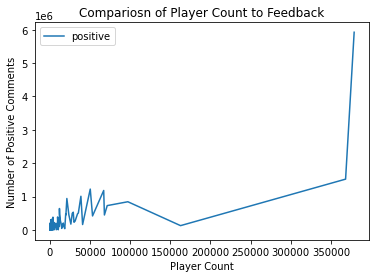

In [13]:
#Create charts to show relationships between SEAMS elements 
final_combined_df = final_combined_data_df.sort_values('player count', ascending=False)
x = final_combined_df
x
x.plot('player count', 'average_2weeks', kind='line', title='Comparison of Player Count to Average Play Time (min)', xlabel='Player Count', ylabel='Average Player Time (min)')
#plt.savefig("Player v Average Play Time.png")
x.plot('player count', 'positive', kind='line', title='Compariosn of Player Count to Feedback', xlabel='Player Count', ylabel='Number of Positive Comments')
x.plot('player count', 'average_forever', kind='scatter', title='Scatter Plot of Average Play Time')
#plt.savefig("Player v Comments.png")

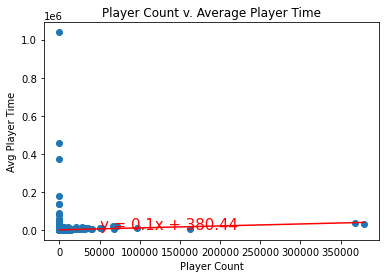

The correlation between both factors is 0.05


<Figure size 432x288 with 0 Axes>

In [11]:
import scipy.stats as st
x.plot('player count', 'average_forever', kind='scatter', title='Scatter Plot of Average Play Time')
x_val = x.loc[:,"player count"]
y_val = x.loc[:,"average_forever"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(50000,5000),fontsize=15,color="red")
plt.title("Player Count v. Average Player Time")
plt.xlabel("Player Count")
plt.ylabel("Avg Player Time")
plt.show()
correlation = st.pearsonr(x_val, y_val)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("Player Count v Avg Player Time.png")

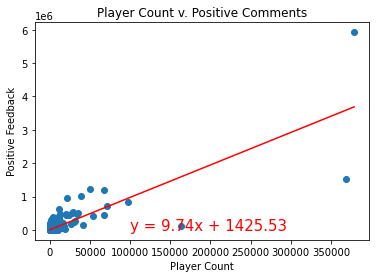

The correlation between both factors is 0.82


<Figure size 432x288 with 0 Axes>

In [14]:
x.plot('player count', 'positive', kind='scatter', title='Scatter Plot of Average Play Time')
x_val = x.loc[:,"player count"]
y_val = x.loc[:,"positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(100000,5000),fontsize=15,color="red")
plt.title("Player Count v. Positive Comments")
plt.xlabel("Player Count")
plt.ylabel("Positive Feedback")
plt.show()
correlation = st.pearsonr(x_val, y_val)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("Player Count v Positive Comments.png")

In [110]:

# steamdata = {'APP ID':appid_info,'App Name': app_name, 'Avg Total Play Time': avg_play_total_time,'Median Total Play Time': avg_median_total, 
#              'Avg Play Time 2 Weeks': avg_play_time_2weeks, 'Median 2 Weeks':median_2Weeks, 'Price':price
#             }
# # steam_df['APP ID'] = appid_info
# # steam_df['App Name'] = app_name
# # steam_df['Avg Play Time'] = avg_play_total_time
# # steam_df['Median Play Time'] =  avg_median_total
# # steam_df['Avg Play Time 2 Weeks'] = avg_play_time_2weeks
# # steam_df['Median 2 Weeks'] = median_2Weeks
# steam_df = pd.DataFrame(steamdata)
    
# steam_df

In [44]:
#Returns the Top 100 apps by players in the last two weeks
new_url = 'https://steamspy.com/api.php?request=top100in2weeks'
steam_df = pd.DataFrame()
steam_df['APP ID'] = ""
steam_df['App Name'] = ""
steam_df['Avg Play Time'] = ""
steam_df['Avg Play Time 2 Weeks'] = ""

# new_url = 'https://steamspy.com/api.php?request=top100in2weeks'
# params = { '?request=': 'top50', "length":"in2weeks"}
response = requests.get(new_url).json()
#top100_df = pd.DataFrame(response).T
#top100_df
#top100_df.to_csv('Top100.csv', index=False) 

In [43]:
#top100_df.dtypes

In [ ]:
#return apps with 1,000-1,999 owners.
new_url = 'https://steamspy.com/api.php?request=all&page=1'
steam_df = pd.DataFrame()
steam_df['APP ID'] = ""
steam_df['App Name'] = ""
steam_df['Avg Play Time'] = ""
steam_df['Avg Play Time 2 Weeks'] = ""

# new_url = 'https://steamspy.com/api.php?request=top100in2weeks'
# params = { '?request=': 'top50', "length":"in2weeks"}
response = requests.get(new_url).json()
# response. weather_df.to_csv('WeatherPy.csv', index=False) 
owners_df = pd.DataFrame(response).T
owners_df = owners_df.reset_index()
del owners_df['index']
owners_df
#response
#owners_df.to_csv('SEAMS_Data.csv', index=False)

In [ ]:
# new_url = 'https://steamspy.com/api.php?request=top100in2weeks'
# new_url2 = 'https://steamspy.com/api.php?request=appdetails&appid=231200'
# steam_df = pd.DataFrame()
# steam_df['APP ID'] = ""
# steam_df['App Name'] = ""
# steam_df['Avg Play Time'] = ""
# steam_df['Median Play Time'] = ""
# steam_df['Avg Play Time 2 Weeks'] = ""
# steam_df['Median Play Time 2 Weeks'] = ""
# # new_url = 'https://steamspy.com/api.php?request=top100in2weeks'
# # params = { '?request=': 'top50', "length":"in2weeks"}
# response = requests.get(new_url2).json()
# response 

Final DataFrame and Group Code Starts Here

In [5]:
final_combined_data_df = pd.read_csv('./Final_Combined_DataF.csv')

In [6]:
final_combined_data_df

,appid,player count,name,developer,publisher,score_rank,positive,negative,userscore,owners,...,price,initialprice,discount,ccu,Final Price_$,Initial Price_$,Discount_$,Total Score,Mark,Tier
0,570,368142,Dota 2,Valve,Valve,NaN,1522243,314225,0,"200,000,000 .. 500,000,000",...,0,0,0,624634,9.53,0.00,0.00,1836468,83%,A
1,730,378812,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,NaN,5926012,785171,0,"50,000,000 .. 100,000,000",...,0,0,0,747905,2.64,0.00,0.00,6711183,88%,B
2,578080,67089,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,1182394,907360,0,"50,000,000 .. 100,000,000",...,0,0,0,256666,2.22,0.00,0.00,2089754,57%,B
3,1063730,40836,New World,Amazon Games,Amazon Games,NaN,161467,74422,0,"50,000,000 .. 100,000,000",...,3999,3999,0,52597,0.94,39.99,39.99,235889,68%,B
4,440,97140,Team Fortress 2,Valve,Valve,NaN,844446,57326,0,"50,000,000 .. 100,000,000",...,0,0,0,97510,1.04,0.00,0.00,901772,94%,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21114,544380,0,Tesla: The Weather Man,"Thoughtquake Studios, LLC","Thoughtquake Studios, LLC",NaN,6,1,0,"0 .. 20,000",...,299,299,0,0,0.00,2.99,2.99,7,86%,M
21115,831520,0,Jurassic City Walk,Real Fighting,Real Fighting,NaN,4,21,0,"0 .. 20,000",...,0,0,0,0,0.00,0.00,0.00,25,-84%,M
21116,834340,0,The Hardest Dungeon,Pippala Games,Pippala Games,NaN,16,4,0,"0 .. 20,000",...,0,0,0,0,0.00,0.00,0.00,20,80%,M
21117,818670,0,Save Snegurochka!,TIPA Games Berlin,TIPA Games Berlin,NaN,5,0,0,"0 .. 20,000",...,899,899,0,0,0.00,8.99,8.99,5,100%,M


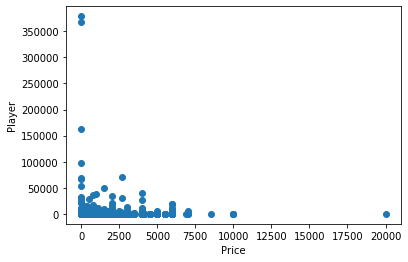

In [4]:
#Nico's code
plt.scatter(final_combined_data_df.iloc[:,14],final_combined_data_df.iloc[:,1])
plt.xlabel('Price')
plt.ylabel('Player')
plt.show()
#why is the price not between 0 and 99?

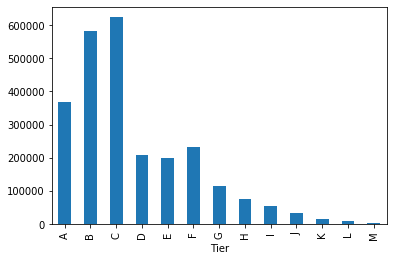

In [5]:
#Nico's code
bar_users = final_combined_data_df.groupby("Tier")["player count"].sum()
bar_users.plot(kind="bar")

plt.show()

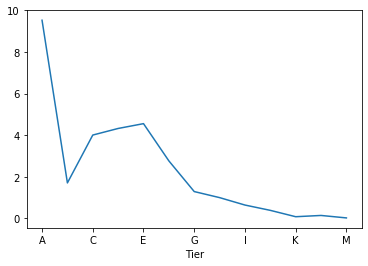

In [6]:
#Nico's code
final_price = final_combined_data_df.groupby("Tier")["Final Price_$"].mean()
final_price.plot(kind="line")
plt.show()
#how to combine line and bar?

In [7]:
final_combined_data_df[["Mark"]].str.replace("%","")
final_combined_data_df[["Mark"]].astype(int)
avg_rating=final_combined_data_df.groupby("Tier")["Mark"].mean()

AttributeError: 'DataFrame' object has no attribute 'str'

In [30]:
#Yi's code starts here
df=pd.read_csv(r'Final_Combined_DataF.csv')


#1.classify data by owners
#df.groupby('owners').count()

In [46]:
#compare median_2week and median_forever for each game
#replace all NaN to 0
df=df.fillna(0)
df2=df[df['median_2weeks']>df['median_forever']]
df2['median_range']=df2['median_2weeks']-df2['median_forever']
#sort by difference 
df3=df2.sort_values(by=['median_range'],ascending=[False])
df3

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,appid,player count,name,developer,publisher,score_rank,positive,negative,userscore,owners,...,initialprice,discount,ccu,Final Price_$,Initial Price_$,Discount_$,Total Score,Mark,Tier,median_range
1421,1252780,291,Bloons Monkey City,Ninja Kiwi,Ninja Kiwi,0.0,3781,339,0,"200,000 .. 500,000",...,0,0,296,142.30,0.00,0.00,4120,92%,I,14110
2588,766370,1,Dying Light: Bad Blood,Techland,Techland Publishing,0.0,2533,1085,0,"100,000 .. 200,000",...,0,0,1,126.94,0.00,0.00,3618,70%,J,12532
167,8500,2909,EVE Online,CCP,CCP,0.0,21302,7361,0,"2,000,000 .. 5,000,000",...,0,0,3892,105.36,0.00,0.00,28663,74%,F,10412
1404,1344350,32,SUCCUBUS: Prologue,Madmind Studio,Madmind Studio,0.0,4281,907,0,"200,000 .. 500,000",...,0,0,38,102.04,0.00,0.00,5188,83%,I,10151
64,466240,272,Deceit,World Makers,World Makers,0.0,66505,17722,0,"5,000,000 .. 10,000,000",...,0,0,703,84.41,0.00,0.00,84227,79%,E,8348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,203140,115,Hitman: Absolution,Io-Interactive A/S,Io-Interactive A/S,0.0,36014,3316,0,"2,000,000 .. 5,000,000",...,1999,0,226,4.03,19.99,19.99,39330,92%,F,5
1022,374280,162,Hired Ops,Absolut Soft LLC,HH-Games,0.0,8161,4257,0,"500,000 .. 1,000,000",...,0,0,465,0.67,0.00,0.00,12418,66%,H,5
833,311730,26,DEAD OR ALIVE 5 Last Round: Core Fighters,"Team NINJA, KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",0.0,5980,2965,0,"500,000 .. 1,000,000",...,0,0,44,0.25,0.00,0.00,8945,67%,H,3
3325,940910,8,Minoria,Bombservice,DANGEN Entertainment,0.0,1569,330,0,"50,000 .. 100,000",...,1999,50,12,0.95,9.99,19.99,1899,83%,K,2


In [16]:
#Cut out top 100 game data
df.head(1000)

,appid,player count,name,developer,publisher,score_rank,positive,negative,userscore,owners,...,price,initialprice,discount,ccu,Final Price_$,Initial Price_$,Discount_$,Total Score,Mark,Tier
0,570,368142,Dota 2,Valve,Valve,NaN,1522243,314225,0,"200,000,000 .. 500,000,000",...,0,0,0,624634,9.53,0.00,0.00,1836468,83%,A
1,730,378812,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,NaN,5926012,785171,0,"50,000,000 .. 100,000,000",...,0,0,0,747905,2.64,0.00,0.00,6711183,88%,B
2,578080,67089,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,1182394,907360,0,"50,000,000 .. 100,000,000",...,0,0,0,256666,2.22,0.00,0.00,2089754,57%,B
3,1063730,40836,New World,Amazon Games,Amazon Games,NaN,161467,74422,0,"50,000,000 .. 100,000,000",...,3999,3999,0,52597,0.94,39.99,39.99,235889,68%,B
4,440,97140,Team Fortress 2,Valve,Valve,NaN,844446,57326,0,"50,000,000 .. 100,000,000",...,0,0,0,97510,1.04,0.00,0.00,901772,94%,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,222940,38,THE KING OF FIGHTERS XIII STEAM EDITION,SNK CORPORATION,SNK CORPORATION,NaN,8024,846,0,"500,000 .. 1,000,000",...,1999,1999,0,99,0.00,19.99,19.99,8870,90%,H
996,6370,2,Bloodline Champions,Stunlock Studios,Stunlock Studios,NaN,1408,243,0,"500,000 .. 1,000,000",...,0,0,0,2,0.00,0.00,0.00,1651,85%,H
997,6840,3,Commandos 3: Destination Berlin,Pyro Studios,Kalypso Media Digital,NaN,612,353,0,"500,000 .. 1,000,000",...,499,499,0,11,0.00,4.99,4.99,965,63%,H
998,462770,16,Pyre,Supergiant Games,Supergiant Games,NaN,7218,737,0,"500,000 .. 1,000,000",...,1999,1999,0,18,0.00,19.99,19.99,7955,91%,H


In [17]:
#picked top five most appreared game publishers in the list to do further analysis
#count how many games did each game publisher published
#Average price of each game publisher 
#total ccu of each game publisher 
#mean mark of each publisher

df_counts=df['publisher'].value_counts(sort=True,ascending=False)
list_com5=df_counts.head(6).index.tolist()[1:6]
game_count_list=[]
price_list=[]
mean_fen_list=[]
ccu_sum_list=[]
for com in list_com5:
    df_tmp=df[df['publisher']==com]
    mean_price=df_tmp['price'].mean()
    price_list.append(mean_price)

    game_count=len(df_tmp['name'])
    game_count_list.append(game_count)

    ccu_sum=df_tmp['ccu'].sum()
    ccu_sum_list.append(ccu_sum)

    df_tmp['fenshu']=df_tmp['positive']+df_tmp['negative']
    mean_fen=df_tmp['positive'].sum()/df_tmp['fenshu'].sum()
    mean_fen_list.append(mean_fen)

df_com5=pd.DataFrame({'game_count':game_count_list,'mean_price':price_list,'total ccu':ccu_sum_list
,'mean_mark':mean_fen_list},index=list_com5)
print(df_com5)

                  game_count   mean_price  total ccu  mean_mark
Square Enix               74  2008.500000       8114   0.809753
Ubisoft                   69  2029.086957      68567   0.839371
Devolver Digital          68  1359.014706       5774   0.926105
Electronic Arts           59  2160.932203     236743   0.809815
THQ Nordic                57  1509.543860       5781   0.823747


C:\Users\huntl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
#Modify the mean_price value
df_com5['mean_price'] = df_com5['mean_price'] * 0.01
df_com5['mean_mark'] = df_com5['mean_mark']*100
df_com5

,game_count,mean_price,total ccu,mean_mark
Square Enix,74,20.085000,8114,80.975267
Ubisoft,69,20.290870,68567,83.937064
Devolver Digital,68,13.590147,5774,92.610499
Electronic Arts,59,21.609322,236743,80.981468
THQ Nordic,57,15.095439,5781,82.374668


In [19]:
## Using reset_index to convert index to column
df = pd.DataFrame(df_com5)
df2 = df.rename_axis('publisher').reset_index()
df2

,publisher,game_count,mean_price,total ccu,mean_mark
0,Square Enix,74,20.085000,8114,80.975267
1,Ubisoft,69,20.290870,68567,83.937064
2,Devolver Digital,68,13.590147,5774,92.610499
3,Electronic Arts,59,21.609322,236743,80.981468
4,THQ Nordic,57,15.095439,5781,82.374668


Text(0, 0.5, 'Game Published')

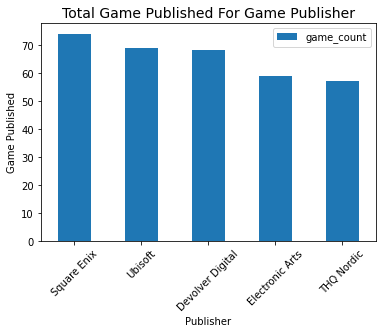

In [20]:
import matplotlib.pyplot as plt
# Generate a bar plot showing the Total game published for each game publisher using Pandas.
df2.plot.bar(x='publisher', y='game_count', rot=45)
plt.title("Total Game Published For Game Publisher", fontsize = 14)
plt.xlabel("Publisher")
plt.ylabel("Game Published")

Text(0, 0.5, 'Current online player')

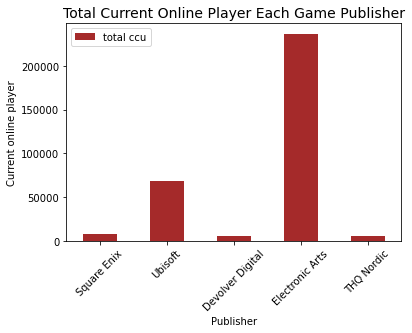

In [21]:
# Generate a bar plot showing the Total Current Online Player Each Game Publisher using Pandas.
df2.plot.bar(x='publisher', y='total ccu', rot=45,color ='brown')
plt.title("Total Current Online Player Each Game Publisher", fontsize = 14)
plt.xlabel("Publisher")
plt.ylabel("Current online player")

Text(0, 0.5, 'Mean Price')

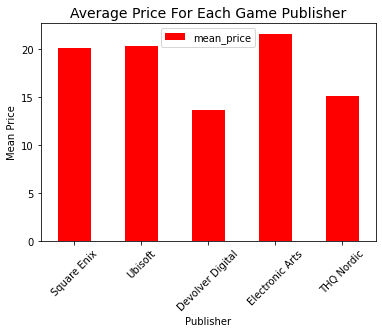

In [22]:
# Generate a bar plot showing the Average Price For Each Game Publisher using Pandas.
df2.plot.bar(x='publisher', y='mean_price', rot=45,color ='red')
plt.title("Average Price For Each Game Publisher", fontsize = 14)
plt.xlabel("Publisher")
plt.ylabel("Mean Price")

Text(0, 0.5, 'Rate')

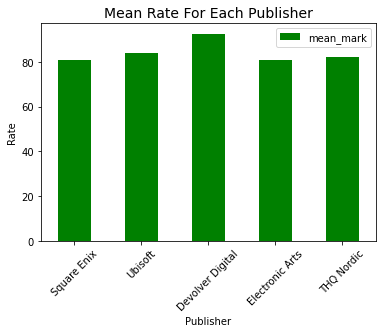

In [23]:
# Generate a bar plot showing the Total game published for each game publisher using Pandas.
df2.plot.bar(x='publisher', y='mean_mark', rot=45,color ='green')
plt.title("Mean Rate For Each Publisher", fontsize = 14)
plt.xlabel("Publisher")
plt.ylabel("Rate")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


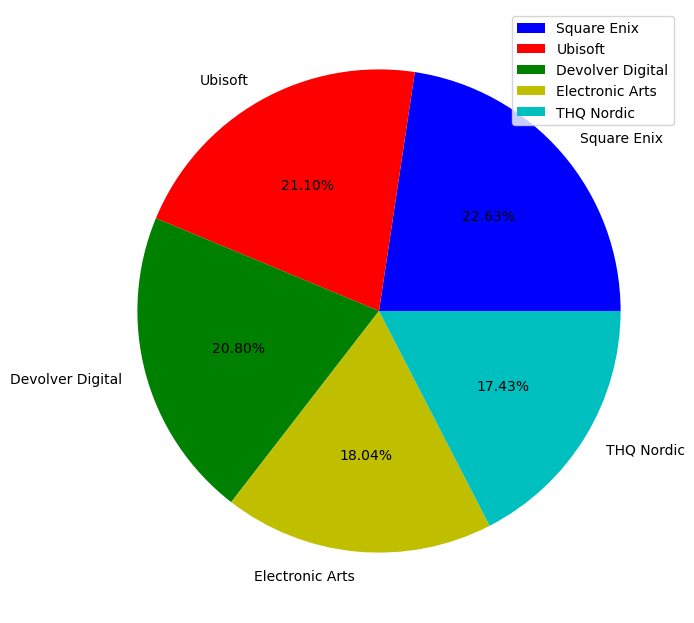

In [24]:
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif'] = ['SimHei'] 

plt.figure(figsize=(20,8),dpi=100)


plt.pie(game_count_list,labels=list_com5,autopct='%1.2f%%',colors=['b','r','g','y','c','m','y','k','c','g','y'])

plt.legend()

plt.show()


## Regression and Correlation for reference: Player Count vs Final Price

The correlation between Player Count and Final Price is 0.04


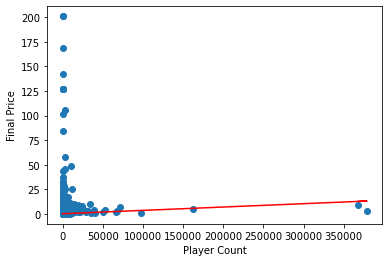

In [25]:
import scipy.stats as st

corr=round(st.pearsonr(final_combined_data_df['player count'],final_combined_data_df['Final Price_$'])[0],2)
print(f"The correlation between Player Count and Final Price is {corr}")
model = st.linregress(final_combined_data_df['player count'],final_combined_data_df['Final Price_$'])

y_values = final_combined_data_df['player count']*model[0]+model[1]
plt.scatter(final_combined_data_df['player count'],final_combined_data_df['Final Price_$'])
plt.plot(final_combined_data_df['player count'],y_values,color="red")
plt.xlabel('Player Count')
plt.ylabel('Final Price')
plt.show()

In [26]:
players_prices_df = final_combined_data_df.loc[:, ['player count', 'Final Price_$']]

In [27]:
corr = players_prices_df.corr()
corr

,player count,Final Price_$
player count,1.000000,0.039922
Final Price_$,0.039922,1.000000


In [28]:
corr.style.background_gradient(cmap ='coolwarm')

,player count,Final Price_$
player count,1.000000,0.039922
Final Price_$,0.039922,1.000000


## Hypothesis - If the number of players in a game is related to the price of a game, then price is a factor of game popularity.

### Null Hypothesis - Price of a game is a factor in game popularity.

### Alternative Hypothesis - Price of a game is NOT a factor in game popularity.

In [29]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(final_combined_data_df['player count'],final_combined_data_df['Final Price_$'], 
                      equal_var=False)
print(f"t is {t_stat:.2f} while p is {p_val:.6f}")
if p_val < 0.05:
    print('Null hypothesis is rejected and Alternative Hypothesis is true.')
else:
    print('P = 0.99 and is > 0.05 so the Null Hypothesis is true.')

t is 4.26 while p is 0.000020
Null hypothesis is rejected and Alternative Hypothesis is true.
